ANALISIS EXPLORATORIO DE DATOS

Importamos la libreria requests para conectarnos a la api, a la cual accedemos habiendo leido previamente la documentacion que nos provee JUNAR (la api es creada y controlada por ellos).

In [207]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [208]:
key = 'qE29eaKutGdmwLrKI2w5eam5Yosu2vSotBiRi1Sw' #Llave de acceso para la api
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams?auth_key={key}' 
#Debemos ir modificando la url para navegar a traves de los datasets

In [209]:
response = requests.get(url=url)
response #Si el response code es 200, la api nos envio el dataset.

<Response [200]>

In [210]:
response.json() #Este codigo nos devuelve un json con todos los datastreams, podemos navegar para conseguir los datasets necesarios.

[{'status': None,
  'description': 'Listado de empresas habilitadas para homologacion de equipos',
  'parameters': [],
  'tags': [],
  'last_revision_id': None,
  'timestamp': 1672890489131,
  'created_at': 1654221630,
  'title': 'Homologaciones Listado de Empresas',
  'modified_at': 1654221646,
  'category_id': '83496',
  'methods': None,
  'sources': [],
  'total_revisions': None,
  'frequency': 'daily',
  'link': 'http://datosabiertos.enacom.gob.ar/dataviews/260918/homologaciones-listado-de-empresas/',
  'user': 'asrozada',
  'status_str': None,
  'guid': 'HOMOL-LISTA-DE-EMPRE',
  'category_name': 'Homologación de Equipos',
  'endpoint': 'https://www.enacom.gob.ar/public/datosabiertos/Empresas_homologadas/Empresas_homologadas.csv'},
 {'status': None,
  'description': 'Listado de prestadores con licencias TIC activas',
  'parameters': [],
  'tags': [],
  'last_revision_id': None,
  'timestamp': 1672885270036,
  'created_at': 1654220805,
  'title': 'Listado de licencias TIC otorgadas'

Ahora con la api pediremos los datasets que creamos necesarios para el proyecto y los convertiremos en dataframes con pandas.

Penetración de Internet fijo (accesos por cada 100 hogares)
Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia

In [211]:
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-DEL-INTER-FIJO-POR/data.csv/?auth_key={key}' 
response = requests.get(url=url)
response #Si el response code es 200, la api nos envio el dataset.

<Response [200]>

In [212]:
df_internet_100_hogares_prov = pd.read_csv(url)
df_internet_100_hogares_prov

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,2,Buenos Aires,26
1,2022,2,Capital Federal,50
2,2022,2,Catamarca,16
3,2022,2,Chaco,12
4,2022,2,Chubut,26
...,...,...,...,...
811,2014,1,Santa Cruz,9
812,2014,1,Santa Fe,15
813,2014,1,Santiago Del Estero,4
814,2014,1,Tierra Del Fuego,19


Penetración por hogares nacional de Internet fijo
Serie trimestral de la penetración del Internet fijo en la métrica por cada 100 hogares

In [213]:
#url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-POR-HOGAR-NACIO-DEL/data.csv/?auth_key={key}' 
#response = requests.get(url=url)
#response #Si el response code es 200, la api nos envio el dataset.

In [214]:
#df_internet_100_hogares_nac = pd.read_csv(url)
#df_internet_100_hogares_nac 
#Este llamado a la api nos devolvia un HTTPerror (HTTP Error 500: Internal Server Error), por lo que decidimos descargar el csv
# e ingresarlo manualmente.

In [215]:
df_internet_100_hogares_nac = pd.read_csv('InternetCada100HogaresNacional.csv')
df_internet_100_hogares_nac

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,2,"75,97","23,72",Abr-Jun 2022
1,2022,1,"73,88","23,05",Ene-Mar 2022
2,2021,4,"73,18","22,81",Oct-Dic 2021
3,2021,3,"70,58","21,98",Jul-Sept 2021
4,2021,2,"69,24","21,55",Abr-Jun 2021
5,2021,1,"67,95","21,13",Ene-Mar 2021
6,2020,4,"67,62","21,01",Oct-Dic 2020
7,2020,3,"66,31","20,59",Jul-Sept 2020
8,2020,2,"64,21","19,92",Abr-Jun 2020
9,2020,1,"62,86","19,48",Ene-Mar 2020


Total nacional de accesos a Internet fijo por banda ancha y banda angosta
Número total de accesos al servicio de Internet fijo por banda ancha y banda angosta (trimestral)

In [216]:
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/TOTAL-NACIO-DE-ACCES-48866/data.csv/?auth_key={key}' 
response = requests.get(url=url)
response #Si el response code es 200, la api nos envio el dataset.

<Response [200]>

In [217]:
df_internet_accesos_nac = pd.read_csv(url)
df_internet_accesos_nac

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
1,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
2,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
3,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021
4,2021,2,9.852.702,10.382,9.863.084,Abr-Jun 2021
5,2021,1,9.637.956,10.016,9.647.972,Ene-Mar 2021
6,2020,4,9.561.546,10.016,9.571.562,Oct-Dic 2020
7,2020,3,9.346.183,10.016,9.356.199,Jul-Sept 2020
8,2020,2,9.021.040,10.016,9.031.056,Abr-Jun 2020
9,2020,1,8.802.435,9.991,8.812.426,Ene-Mar 2020


Accesos a banda ancha y banda angosta por provincia
Número de accesos al servicio de Internet fijo por banda ancha y banda angosta en cada provincia (trimestral)

In [218]:
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/BANDA-ANCHA-Y-BANDA-ANGOS/data.csv/?auth_key={key}' 
response = requests.get(url=url)
response #Si el response code es 200, la api nos envio el dataset.

<Response [200]>

In [219]:
df_internet_accesos_prov = pd.read_csv(url)
df_internet_accesos_prov

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,2,Buenos Aires,4.660.984,6.199,4.667.183
1,2022,2,Capital Federal,1.534.626,2.145,1.536.771
2,2022,2,Catamarca,67.007,1,67.008
3,2022,2,Chaco,143.559,5,143.564
4,2022,2,Chubut,161.901,904,162.805
...,...,...,...,...,...,...
811,2014,1,Santa Cruz,26.304,460,26.764
812,2014,1,Santa Fe,506.000,612,506.612
813,2014,1,Santiago Del Estero,37.124,9,37.133
814,2014,1,Tierra Del Fuego,27.272,766,28.038


Serie trimestral de accesos a Internet fijo por tecnología
Número de accesos al servicio de Internet fijo por tipo de tecnología. Total nacional (trimestral)

In [220]:
#url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/SERIE-TRIME-DE-ACCES-A/data.csv/?auth_key={key}' 
#response = requests.get(url=url)
#response #Si el response code es 200, la api nos envio el dataset.

In [221]:
df_internet_accesos_tecno_nac = pd.read_csv('InternetAccesoPorTecnologiaNacional.csv')
df_internet_accesos_tecno_nac

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
1,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
2,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
3,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021
4,2021,2,2.018.587,5.641.731,1.472.246,476.968,253.552,9.863.084,Abr-Jun 2021
5,2021,1,2.175.211,5.424.782,1.362.976,434.548,250.455,9.647.972,Ene-Mar 2021
6,2020,4,2.213.949,5.371.824,1.311.199,421.554,253.036,9.571.562,Oct-Dic 2020
7,2020,3,2.263.889,5.259.351,1.170.879,413.259,248.821,9.356.199,Jul-Sept 2020
8,2020,2,2.295.533,5.005.115,1.106.725,376.667,247.016,9.031.056,Abr-Jun 2020
9,2020,1,2.299.457,4.903.674,1.047.817,352.333,209.145,8.812.426,Ene-Mar 2020


Acceso a Internet fijo por tecnología y provincia
Número de accesos al servicio de Internet fijo por tipo de tecnología en cada provincia (trimestral)

In [222]:
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-POR/data.csv/?auth_key={key}' 
response = requests.get(url=url)
response #Si el response code es 200, la api nos envio el dataset.

<Response [200]>

In [223]:
df_internet_accesos_tecno_prov = pd.read_csv(url)
df_internet_accesos_tecno_prov

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,2,Buenos Aires,350.652,2.719.613,1.399.043,126.847,71.028,4.667.183
1,2022,2,Capital Federal,145.491,1.232.226,121.506,5.757,31.791,1.536.771
2,2022,2,Catamarca,11.928,9.430,42.087,1.329,2.234,67.008
3,2022,2,Chaco,29.552,61.284,42.194,8.178,2.356,143.564
4,2022,2,Chubut,45.377,69.242,9.574,29.784,8.828,162.805
...,...,...,...,...,...,...,...,...,...
812,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
813,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
814,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038
815,2014,1,Tucumán,129.717,83,121,13.000,98.000,130.032


Velocidad Media de bajada de Internet fijo

Serie histórica de la velocidad media de descarga de Internet nacional (trimestral)

In [224]:
#url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/VELOC-PROME-DE-BAJAD-DE/data.csv/?auth_key={key}' 
#response = requests.get(url=url)
#response #Si el response code es 200, la api nos envio el dataset.
# Existe un error en la api al traer este dataset, por lo que lo hacemos manualmente.

In [225]:
df_internet_bajada_nac = pd.read_csv('InternetMediaBajadaNacional.csv')
df_internet_bajada_nac

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,2,"58,44",Abr-Jun 2022
1,2022,1,"55,11",Ene-Mar 2022
2,2021,4,"52,34",Oct-Dic 2021
3,2021,3,"48,46",Jul-Sept 2021
4,2021,2,"45,63",Abr-Jun 2021
5,2021,1,"43,11",Ene-Mar 2021
6,2020,4,"42,36",Oct-Dic 2020
7,2020,3,"40,67",Jul-Sept 2020
8,2020,2,"38,32",Abr-Jun 2020
9,2020,1,"37,52",Ene-Mar 2020


Velocidad media de bajada de Internet fijo por provincia

Serie histórica de la velocidad media de descarga de Internet por provincia (trimestral)

In [226]:
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/VELOC-PROME-DE-BAJAD-DE/data.csv/?auth_key={key}' 
response = requests.get(url=url)
response #Si el response code es 200, la api nos envio el dataset.

<Response [200]>

In [227]:
df_internet_bajada_prov = pd.read_csv(url)
df_internet_bajada_prov

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,2,Buenos Aires,66
1,2022,2,Capital Federal,94
2,2022,2,Catamarca,57
3,2022,2,Chaco,51
4,2022,2,Chubut,15
...,...,...,...,...
811,2014,1,Santa Cruz,3
812,2014,1,Santa Fe,3
813,2014,1,Santiago Del Estero,3
814,2014,1,Tierra Del Fuego,3


Distribución de los accesos totales nacionales a Internet fijo por velocidad

Distribución de los accesos totales nacionales a Internet fijo por velocidad de bajada (último trimestre disponible)


In [228]:
#url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/DISTR-DE-LOS-ACCES-76145/data.csv/?auth_key={key}' 
#response = requests.get(url=url)
#response #Si el response code es 200, la api nos envio el dataset.
#ERROR HTTP 500

In [229]:
df_internet_distr_bajada_nac = pd.read_csv('InternetDistribucionPorBajada.csv')
df_internet_distr_bajada_nac

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684,NaN
1,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009,NaN
2,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794,NaN
3,2021,3,40.174,41.437,2.550.229,1.095.772,710.122,536.364,4.948.174,163.269,10.085.541,NaN
4,2021,2,40.172,42.024,2.531.271,1.080.279,693.277,647.401,4.661.291,167.369,9.863.084,NaN
5,2021,1,39.487,41.674,2.593.477,1.072.722,737.930,595.920,4.379.965,186.797,9.647.972,NaN
6,2020,4,39.510,42.185,2.622.638,1.073.875,786.595,582.420,4.239.237,185.102,9.571.562,NaN
7,2020,3,41.038,44.005,2.637.984,1.040.017,799.350,538.567,4.053.461,201.777,9.356.199,NaN
8,2020,2,41.038,48.690,2.651.502,1.053.107,807.775,523.437,3.711.499,194.008,9.031.056,NaN
9,2020,1,42.550,56.170,2.649.819,1.022.014,814.470,532.309,3.500.882,194.212,8.812.426,NaN


Ingresos trimestrales por la prestación del servicio de Internet fijo

Ingresos trimestrales de los operadores por el servicio de Internet fijo

In [230]:
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/INGRE-TRIME-POR-LA-PREST/data.csv/?auth_key={key}' 
response = requests.get(url=url)
response #Si el response code es 200, la api nos envio el dataset.

<Response [200]>

In [231]:
df_ingresos_trim = pd.read_csv(url)
df_ingresos_trim

,Año,Trimestre,Ingresos (miles de $),Periodo
0,2013,1,$ 13.135.235,Ene-Mar 2013
1,2013,2,$ 13.970.806,Abr-Jun 2013
2,2013,3,$ 15.235.659,Jul-Sept 2013
3,2013,4,$ 16.218.846,Oct-Dic 2013
4,2014,1,$ 15.938.353,Ene-Mar 2013
5,2014,2,$ 17.680.972,Abr-Jun 2014
6,2014,3,$ 18.976.053,Jul-Sept 2014
7,2014,4,$ 20.012.332,Oct-Dic 2014
8,2015,1,$ 19.337.342,Ene-Mar 2015
9,2015,2,$ 19.945.453,Abr-Jun 2015


Listado de localidades con conectividad a internet.

Listado de localidades con conectividad a internet, con detalle por tipo de conexión.

In [232]:
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/LISTA-DE-LOCAL-CON-CONEC/data.csv/?auth_key={key}' 
response = requests.get(url=url)
response #Si el response code es 200, la api nos envio el dataset.

<Response [200]>

In [233]:
df_localidades_con_internet = pd.read_csv(url)
df_localidades_con_internet

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,25 de Mayo,25 de Mayo,SI,SI,--,SI,SI,SI,SI,SI,SI
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,--,--,--,--,--,--,SI,--,--
2,BUENOS AIRES,25 de Mayo,Del Valle,SI,--,--,--,SI,SI,--,--,SI
3,BUENOS AIRES,25 de Mayo,Ernestina,SI,--,--,--,--,--,--,--,--
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,--,--,--,--,--,--,--,SI,--
...,...,...,...,...,...,...,...,...,...,...,...,...
4307,JUJUY,El Carmen,Los Lapachos (Est. Maquinista Verón),--,--,--,--,SI,SI,--,SI,--
4308,JUJUY,El Carmen,Loteo San Vicente,--,--,--,--,SI,--,--,--,--
4309,JUJUY,El Carmen,Manantiales,--,--,--,--,SI,SI,--,--,SI
4310,JUJUY,El Carmen,Monterrico,--,SI,--,--,SI,SI,SI,SI,SI


Una vez terminado la creacion de los dataframes, vamos a proceder a realizar el EDA (analisis exploratorio de datos)
Para esto, vamos a dividir el analisis en 4 partes. Primero analizaremos los datos números continuos y luego los discretos. Finalmente, analizaremos los datos categoricos dividiendolos entre datos dicotomicos y polinomicos

Analisis de las variables numericas:

In [234]:
df_internet_100_hogares_prov.describe()
df_internet_100_hogares_prov.info()

,Año,Trimestre,Accesos por cada 100 hab
count,816.000000,816.000000,816.000000
mean,2017.764706,2.441176,14.492647
std,2.463681,1.117170,8.942760
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.000000,8.000000
50%,2018.000000,2.000000,12.000000
75%,2020.000000,3.000000,19.000000
max,2022.000000,4.000000,52.000000


In [236]:
df_internet_100_hogares_nac.describe()
df_internet_100_hogares_nac.info()

,Año,Trimestre
count,34.000000,34.000000
mean,2017.764706,2.441176
std,2.499198,1.133276
min,2014.000000,1.000000
25%,2016.000000,1.250000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [244]:
df_internet_accesos_nac.describe()
df_internet_accesos_nac.info()

,Año,Trimestre,Dial up
count,34.000000,34.000000,34.000000
mean,2017.764706,2.441176,23.705324
std,2.499198,1.133276,10.054914
min,2014.000000,1.000000,9.991000
25%,2016.000000,1.250000,12.481750
50%,2018.000000,2.000000,26.991500
75%,2020.000000,3.000000,32.525250
max,2022.000000,4.000000,39.324000


In [241]:
df_internet_accesos_prov.describe()
df_internet_accesos_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               816 non-null    int64 
 1   Trimestre         816 non-null    int64 
 2   Provincia         816 non-null    object
 3   Banda ancha fija  816 non-null    object
 4   Dial up           814 non-null    object
 5   Total             816 non-null    object
dtypes: int64(2), object(4)
memory usage: 38.4+ KB


In [243]:
df_internet_accesos_tecno_nac.describe()
df_internet_accesos_tecno_nac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           34 non-null     int64  
 1   Trimestre     34 non-null     int64  
 2   ADSL          34 non-null     object 
 3   Cablemodem    34 non-null     object 
 4   Fibra óptica  34 non-null     object 
 5   Wireless      34 non-null     float64
 6   Otros         34 non-null     float64
 7   Total         34 non-null     object 
 8   Periodo       34 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.5+ KB


In [245]:
df_internet_accesos_tecno_prov.describe()
df_internet_accesos_tecno_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           817 non-null    object 
 1   Trimestre     817 non-null    object 
 2   Provincia     816 non-null    object 
 3   ADSL          816 non-null    object 
 4   Cablemodem    816 non-null    object 
 5   Fibra óptica  816 non-null    object 
 6   Wireless      816 non-null    float64
 7   Otros         816 non-null    float64
 8   Total         816 non-null    object 
dtypes: float64(2), object(7)
memory usage: 57.6+ KB


In [248]:
df_internet_bajada_nac.describe()
df_internet_bajada_nac.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     34 non-null     int64 
 1   Trimestre               34 non-null     int64 
 2   Mbps (Media de bajada)  34 non-null     object
 3   Trimestre.1             34 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [ ]:
df_internet_bajada_prov.describe()
df_internet_bajada_prov.info()

In [ ]:
df_internet_distr_bajada_nac.describe()
df_internet_distr_bajada_nac.info()

A continuacion realizamos el analisis de la variable categorica que vamos a usar:

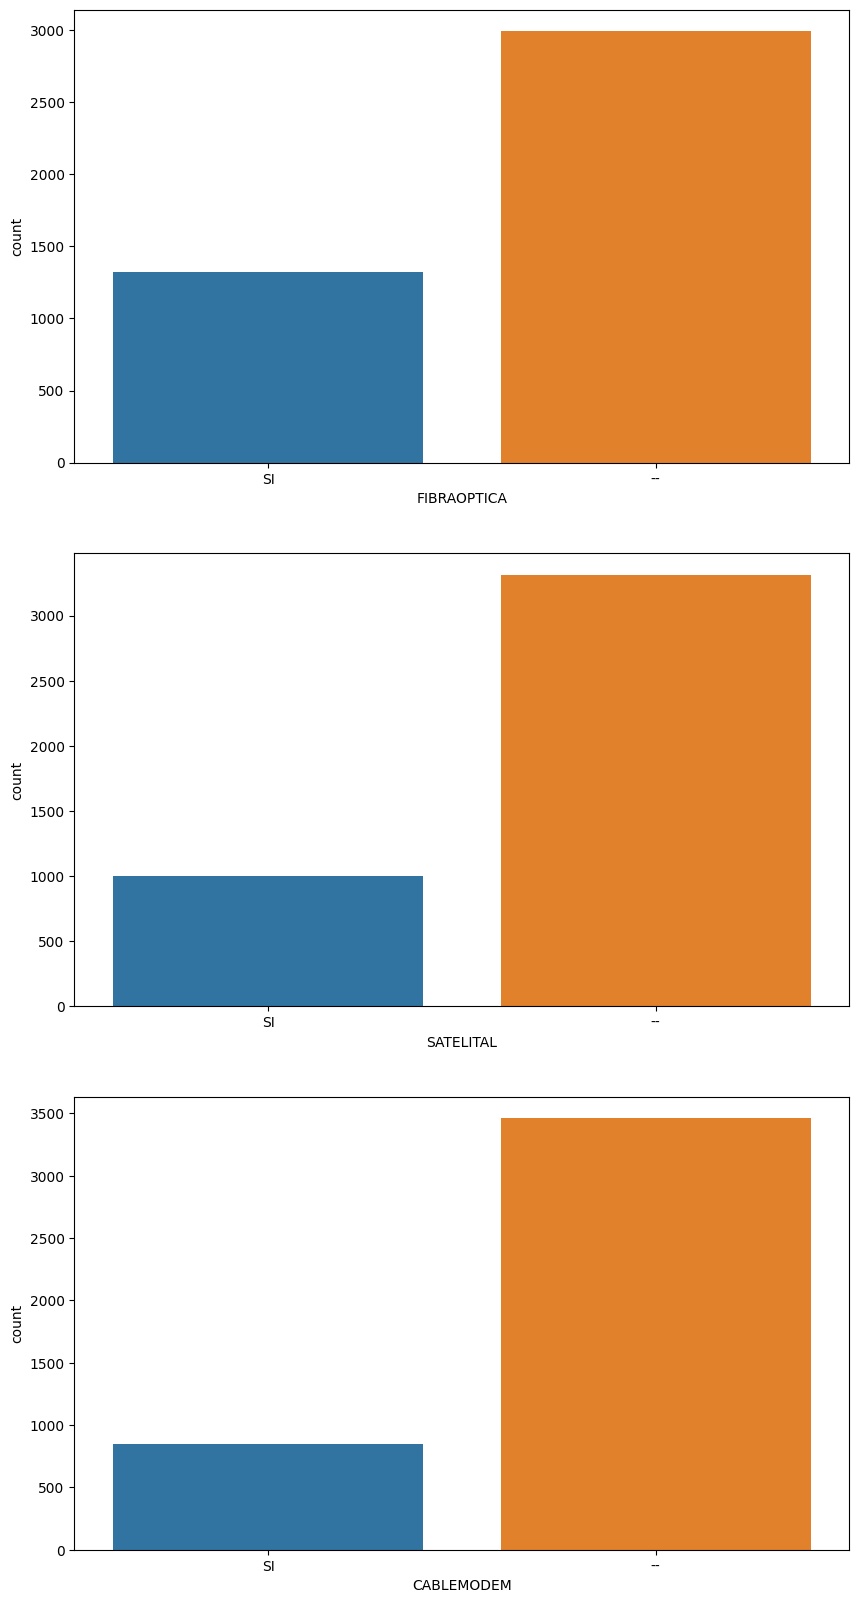

In [249]:
plt.figure(figsize = (10,20))

plt.subplot(3,1,1)
sns.countplot(x=df_localidades_con_internet['FIBRAOPTICA'])

plt.subplot(3,1,2)
sns.countplot(x=df_localidades_con_internet['SATELITAL'])

plt.subplot(3,1,3)
sns.countplot(x=df_localidades_con_internet['CABLEMODEM'])

plt.show()


Finalizado el eda, podemos concluir que los datasets proporcionados tienen una buena calidad, no se encuentran nulos y no hay limpieza que se deba realizar. Ademas hemos hecho un vistazo de los datos para tener una idea general de los valores que podemos encontrar.